<a href="https://colab.research.google.com/github/poring3995/My_Project/blob/MY_Project/Tesla_Stock_Price_Prediction_using_Facebook_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesla (TSLA) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [ ]:
!pip install --upgrade plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a5/07/5bef9376c975ce23306d9217ab69ca94c07f2a3c90b17c03e3ae4db87170/plotly-5.15.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 37.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [16]:
!pip install prophet

In [17]:
import pandas as pd
import plotly.express as px
from prophet import Prophet


In [18]:

import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [22]:
df=pd.read_csv("TSLA.csv")

In [24]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [26]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,414.739109,425.323268,402.764717,415.137952,415.137952,6.178552e+07
std,234.908560,239.374833,229.101662,234.987820,234.987820,3.306128e+07
min,74.940002,80.972000,70.101997,72.244003,72.244003,1.515770e+07
25%,194.901001,199.384003,188.566994,193.368995,193.368995,3.628290e+07
50%,408.951996,418.700012,401.660004,408.500000,408.500000,5.561600e+07
75%,606.549988,627.795013,586.750000,607.234985,607.234985,8.131825e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,2.221262e+08


# Data Visualization using plotly express- Visualizing the historical performance of Tesla

In [28]:
px.area(df,x="Date",y="Close")

In [29]:
px.line(df,x="Date",y="Close")

In [30]:
px.area(df,x="Date",y="Volume")

In [31]:
px.bar(df,y="Volume")

In [32]:
px.box(df,y="Close")

# Understanding Facebook Prophet

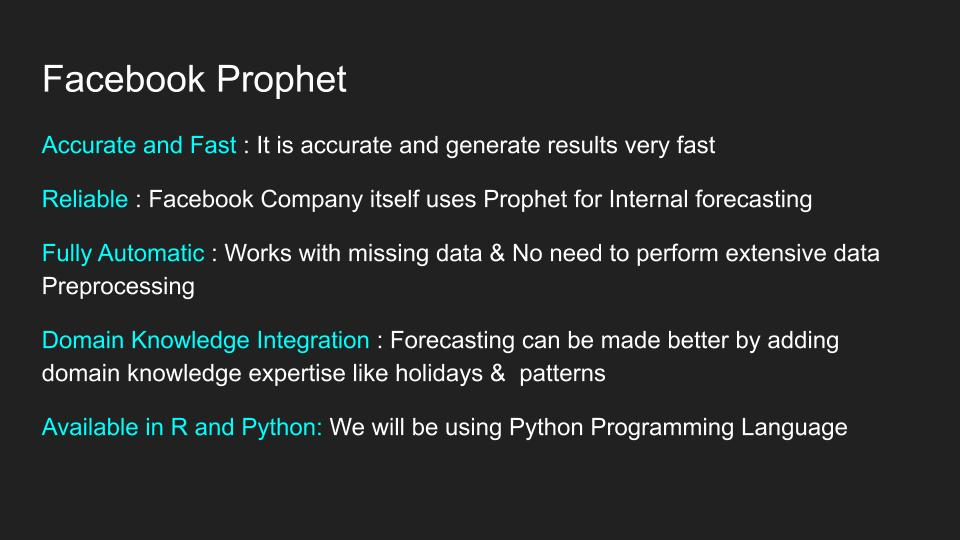

## Data Preperation

In [33]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-16,93.900002,98.973999,88.433998,89.014000,89.014000,102447500
1,2020-03-17,88.001999,94.370003,79.199997,86.040001,86.040001,119973000
2,2020-03-18,77.800003,80.972000,70.101997,72.244003,72.244003,118931000
3,2020-03-19,74.940002,90.400002,71.692001,85.528000,85.528000,150977500
4,2020-03-20,87.639999,95.400002,85.157997,85.505997,85.505997,141427500
...,...,...,...,...,...,...,...
246,2021-03-08,600.549988,620.130005,558.789978,563.000000,563.000000,51787000
247,2021-03-09,608.179993,678.090027,595.210022,673.580017,673.580017,67523300
248,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
249,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900


In [34]:
columns=['Date','Close']
ndf = pd.DataFrame(df,columns=columns)

In [35]:
ndf

,Date,Close
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


In [36]:
prophet_df = ndf.rename(columns={'Date':'ds','Close':'y'})

In [37]:
prophet_df

,ds,y
0,2020-03-16,89.014000
1,2020-03-17,86.040001
2,2020-03-18,72.244003
3,2020-03-19,85.528000
4,2020-03-20,85.505997
...,...,...
246,2021-03-08,563.000000
247,2021-03-09,673.580017
248,2021-03-10,668.059998
249,2021-03-11,699.599976


## Creating Facebook Prophet Model

In [39]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9fj64hf/gntkvbzw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt9fj64hf/e3ppv5_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57554', 'data', 'file=/tmp/tmpt9fj64hf/gntkvbzw.json', 'init=/tmp/tmpt9fj64hf/e3ppv5_z.json', 'output', 'file=/tmp/tmpt9fj64hf/prophet_model11dto_hh/prophet_model-20230806074654.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [42]:
future= m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [41]:
future

,ds
0,2020-03-16
1,2020-03-17
2,2020-03-18
3,2020-03-19
4,2020-03-20
...,...
276,2021-04-07
277,2021-04-08
278,2021-04-09
279,2021-04-10


In [43]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-16,65.594691,-18.679888,148.202503,65.594691,65.594691,-5.865357,-5.865357,-5.865357,-5.865357,-5.865357,-5.865357,0.0,0.0,0.0,59.729334
1,2020-03-17,67.390182,-23.995794,154.832043,67.390182,67.390182,-2.385994,-2.385994,-2.385994,-2.385994,-2.385994,-2.385994,0.0,0.0,0.0,65.004188
2,2020-03-18,69.185673,-13.489481,153.136062,69.185673,69.185673,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,0.0,0.0,0.0,65.690247
3,2020-03-19,70.981163,-16.830044,151.258269,70.981163,70.981163,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,0.0,0.0,0.0,67.136675
4,2020-03-20,72.776654,-17.307009,155.514429,72.776654,72.776654,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,0.0,0.0,0.0,65.014607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,2021-04-07,900.282430,808.232838,985.386331,899.263410,901.344521,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,-3.495425,0.0,0.0,0.0,896.787005
277,2021-04-08,902.739493,816.516027,981.762831,901.638592,903.874161,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,-3.844488,0.0,0.0,0.0,898.895005
278,2021-04-09,905.196556,808.088879,983.492060,904.037070,906.407318,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,-7.762047,0.0,0.0,0.0,897.434509
279,2021-04-10,907.653619,836.427267,999.525928,906.403960,908.963766,11.676654,11.676654,11.676654,11.676654,11.676654,11.676654,0.0,0.0,0.0,919.330272


In [44]:
px.line(forecast,x='ds',y='yhat')

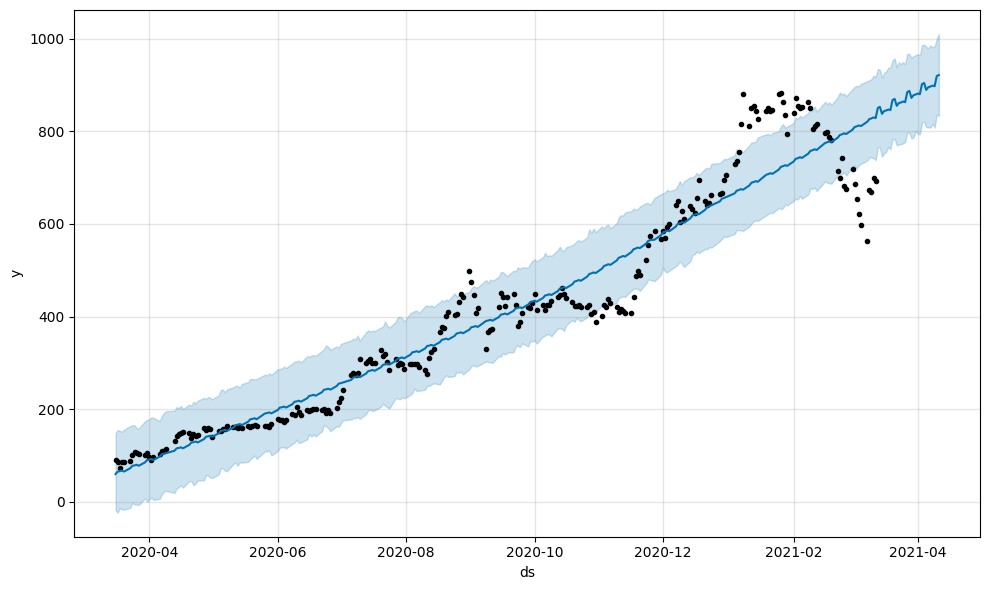

In [47]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

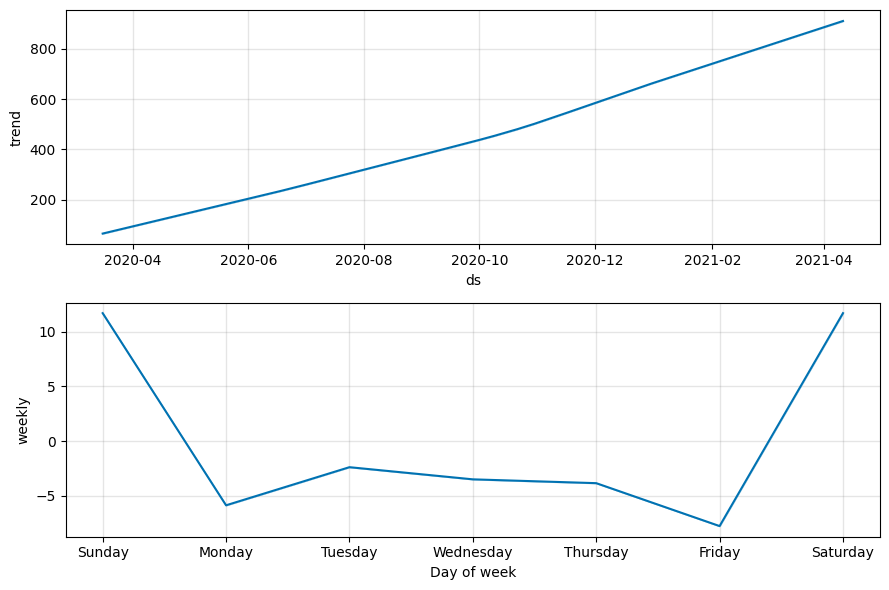

In [49]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [51]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>